## Import Libraries 

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [46]:
df1 = pd.read_csv("2021.csv")

In [47]:
df2 = pd.read_csv("2022.csv")

In [48]:
df3 = pd.read_csv("2023.csv")

In [49]:
df4 = pd.read_csv("2024.csv")

In [50]:
df5 = pd.read_csv("2024.0.csv")

In [51]:
df6 = pd.read_csv("last.csv")

In [52]:
merged_df = pd.concat([df1, df2, df3, df4, df5, df6], ignore_index=True)


In [53]:
df = merged_df

In [54]:
df.shape

(2236, 4)

In [55]:
df.head()

,Date,Views,Watch time (hours),Average view duration
0,Total,30375.000,1334.810,0:02:38
1,2021-01-01,34.000,2.152,0:03:47
2,2020-12-31,13.000,0.475,0:02:11
3,2020-12-30,47.000,2.580,0:03:17
4,2020-12-29,78.000,3.535,0:02:43


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2236 entries, 0 to 2235
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   2236 non-null   object 
 1   Views                  2235 non-null   float64
 2   Watch time (hours)     2235 non-null   float64
 3   Average view duration  2234 non-null   object 
dtypes: float64(2), object(2)
memory usage: 70.0+ KB


In [57]:
df.isnull().sum()

Date                     0
Views                    1
Watch time (hours)       1
Average view duration    2
dtype: int64

In [58]:
df.dropna(inplace=True)

In [59]:
df = df.drop(index=0)

In [60]:
df.head()

,Date,Views,Watch time (hours),Average view duration
1,2021-01-01,34.000,2.152,0:03:47
2,2020-12-31,13.000,0.475,0:02:11
3,2020-12-30,47.000,2.580,0:03:17
4,2020-12-29,78.000,3.535,0:02:43
5,2020-12-28,158.000,7.245,0:02:45


Eğer parse_dates=['timestamp'] argümanını kullanmazsak ve sadece df = pd.read_csv("store_sharing.csv") şeklinde bir kod çalıştırırsak, "timestamp" sütunu varsayılan olarak string olarak okunur ve sıradan bir sütun olarak işlenir:

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2233 entries, 1 to 2235
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   2233 non-null   object 
 1   Views                  2233 non-null   float64
 2   Watch time (hours)     2233 non-null   float64
 3   Average view duration  2233 non-null   object 
dtypes: float64(2), object(2)
memory usage: 87.2+ KB


In [62]:
# 'Date' sütununda "Total" değerine sahip satırları bulmak
total_rows = df[df['Date'] == 'Total']
print(total_rows)  # "Total" olan satırları görmek için

       Date     Views  Watch time (hours) Average view duration
319   Total 20463.000            1108.698               0:03:15
686   Total 10591.000             529.482               0:02:59
1053  Total  4883.000             229.714               0:02:49
1413  Total 13815.000             685.127               0:02:58
1915  Total  9661.000             495.768               0:03:04


In [63]:
# "Total" olan satırları DataFrame'den kaldırmak
df = df[df['Date'] != 'Total']

In [64]:
# 'date' sütununu datetime formatına çevirme
df['Date'] = pd.to_datetime(df['Date'])
df.drop('Average view duration', axis=1, inplace=True)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2228 entries, 1 to 2235
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                2228 non-null   datetime64[ns]
 1   Views               2228 non-null   float64       
 2   Watch time (hours)  2228 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 69.6 KB


In [66]:
df.to_csv("my_data.csv", index=False) 

In [67]:
df = pd.read_csv("my_data.csv", parse_dates=['Date'], index_col="Date")

Datamızın direk index e gelmesi için ve type ı datetime olması için "parse_dates" ve "index_col" parametrelerini kullandık.
"Parse_dates" ı yapmaz isek "Datetime" Index olmazdı ve bu feature Object olarak tanımlanırdı.

index_col="timestamp" ifadesini kullanarak "timestamp" sütununu veri kümesinin indeksi olarak belirttiğimizde, veri çerçevesindeki her satır benzersiz bir zaman damgasıyla tanımlanır. Bu durumda "timestamp" sütunu, satırları birbirinden ayıran benzersiz bir kimlik görevi görür.

Bunun bazı faydaları şunlardır:

Hızlı erişim: Veri çerçevesindeki belirli bir zaman damgasına ait satırlara hızlı bir şekilde erişebilirsiniz. Zaman damgasına dayalı indeksleme, örneğin belirli bir tarih aralığındaki verileri seçmek veya belirli bir zamanda meydana gelen olayları incelemek gibi işlemleri kolaylaştırır.

Zaman serisi analizi: Zaman serisi verileriyle çalışırken, verileri zamana göre sıralamak ve analiz etmek önemlidir. Zaman damgasını indeks olarak belirleyerek, zaman serisi analizine yönelik çeşitli teknikleri kullanabilirsiniz. Örneğin, trendleri, mevsimsellikleri veya zaman içindeki değişiklikleri analiz edebilirsiniz.

Veri hızlandırma: Veri kümesini bir zaman damgasına göre indekslemek, veriye yapılan sorguları hızlandırabilir. Verinin indekslenmesi, belirli bir zaman damgasıyla ilgili satırların hızlı bir şekilde erişilmesini sağlar. Bu, büyük veri kümesi üzerinde yapılan işlemlerde performansı artırabilir.

Grafik çizimi ve görselleştirme: İndekslendiğinde, zaman damgası verilerini içeren veri çerçevesi, doğrudan grafik çizimi ve görselleştirme araçlarına beslenebilir. Zaman serisi verilerini zamanla değişimi gösteren grafikler veya trend analizi gibi görsel temsillerle daha kolay anlayabilirsiniz.

Özetle, zaman damgasını indeks olarak belirlemek, zaman serisi verileriyle çalışırken veriye daha etkili bir şekilde erişmek, analiz etmek ve görselleştirmek için önemli bir adımdır.

In [68]:
df

,Views,Watch time (hours)
Date,,
2021-01-01,34.000,2.152
2020-12-31,13.000,0.475
2020-12-30,47.000,2.580
2020-12-29,78.000,3.535
2020-12-28,158.000,7.245
...,...,...
2024-01-05,47.000,5.211
2024-01-04,10.000,0.166
2024-01-03,8.000,0.244


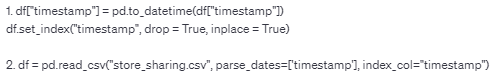

Her ikisi de "store_sharing.csv" dosyasını okuyarak bir veri çerçevesi oluşturur ve "timestamp" sütununu tarih/zaman tipine dönüştürerek indeks olarak ayarlar.

df["timestamp"] = pd.to_datetime(df["timestamp"]): "timestamp" sütununu tarih/zaman tipine dönüştürmek için pd.to_datetime() fonksiyonunu kullanır.

df.set_index("timestamp", drop=True, inplace=True): "timestamp" sütununu veri çerçevesinin indeksi olarak ayarlar.

df = pd.read_csv("store_sharing.csv", parse_dates=['timestamp'], index_col="timestamp"): "store_sharing.csv" dosyasını okurken parse_dates parametresini kullanarak "timestamp" sütununu tarih/zaman tipine dönüştürür ve aynı zamanda bu sütunu veri çerçevesinin indeksi olarak belirler.

Her iki yaklaşım da "timestamp" sütununu indeks olarak kullanılacak şekilde veri çerçevesini düzenler.

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2228 entries, 2021-01-01 to 2024-01-01
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Views               2228 non-null   float64
 1   Watch time (hours)  2228 non-null   float64
dtypes: float64(2)
memory usage: 52.2 KB


Bütün datalarımızın sayısal bir değer olduğunu ve null verinin olmadığını görüyoruz. 

## 1. Exploratory Data Analysis

- Firstly, focus data based on the timestamp. You can create various variables such as, hour, day of week, day of month etc.
- You can check missing values and outliers.
- Also you can plot breakdowns of data.

### Check Missing Values and Outliers

In [70]:
df.isnull().sum()

Views                 0
Watch time (hours)    0
dtype: int64

In [71]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Views,2228.000,39.369,40.301,1.000,14.000,27.000,51.000,408.000
Watch time (hours),2228.000,1.921,1.964,0.000,0.530,1.239,2.718,13.449


Deep Learning de Outlier ların, Machine Learning de olduğu kadar önemi bulunmamaktadır!

### Plot Breakdowns of Data

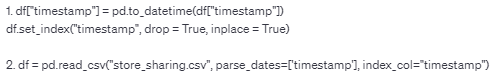

Datamızı indexe attığımız için buradan farklı feature ler çıkartabiliyoruz. Index e atılmasa idi "to_datetime" işlemini yaparak istediğimiz feature ları ortaya çıkarabilecektik. Yapılan analizde bize kolaylık sağlaması için Tarih sütununa bu şekilde bir işlem yaptık. 

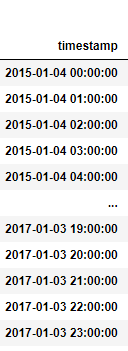

In [72]:
df["year"] = df.index.year
df['month'] = df.index.month 
df['day'] = df.index.day
df['dayofweek'] = df.index.dayofweek
df['hour'] = df.index.hour 
df["date"] = df.index.date

Yeni feature lerin df in sonuna eklendiğini görüyoruz..

In [73]:
df.sample(7)

,Views,Watch time (hours),year,month,day,dayofweek,hour,date
Date,,,,,,,,
2020-04-23,233.000,6.367,2020,4,23,3,0,2020-04-23
2020-12-10,56.000,2.970,2020,12,10,3,0,2020-12-10
2021-01-05,182.000,11.181,2021,1,5,1,0,2021-01-05
2022-09-03,20.000,1.210,2022,9,3,5,0,2022-09-03
2023-11-30,18.000,0.388,2023,11,30,3,0,2023-11-30
2020-07-07,155.000,3.127,2020,7,7,1,0,2020-07-07
2023-09-24,3.000,0.032,2023,9,24,6,0,2023-09-24


Season ların ne olduğu tam olarak belli olsun diye String olarak değiştirdik ve df in sonuna ekledik ki buradaki sayıların ne olduğunu tam olarak göreyim.

***i. Plot watching hours shares over time***


Bu kod, df veri çerçevesinin zamana karşı cnt (sayı) değişkeninin çizgi grafiğini oluşturur. Grafiğin boyutu figsize parametresiyle belirlenir (15 birim genişlik, 5 birim yükseklik). sns.lineplot() işlevi, x eksenine zamanı ve y eksenine cnt değerini yerleştirerek veriyi çizgi grafiği olarak temsil eder.

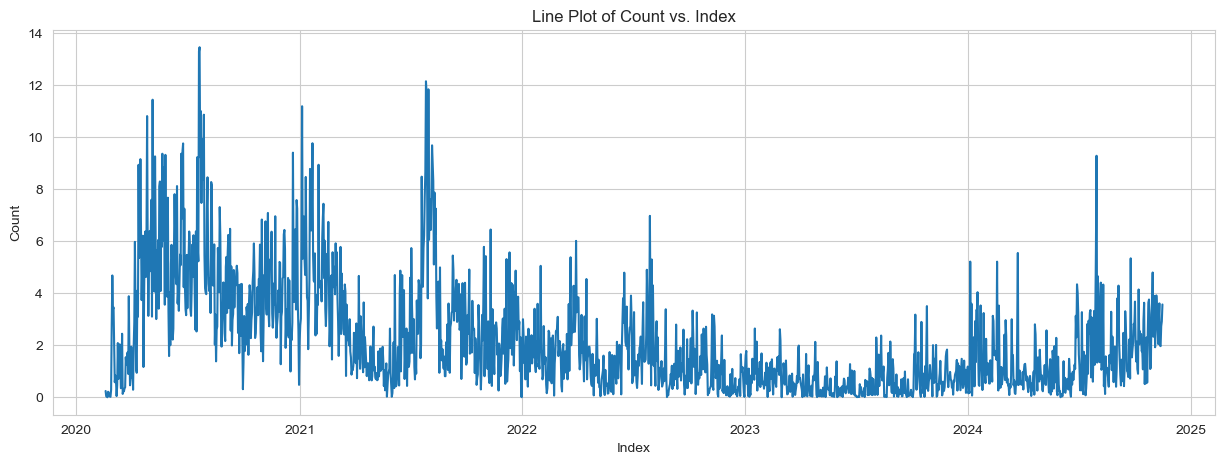

In [74]:
plt.figure(figsize=(15, 5))  # Set the figure size
sns.lineplot(x=df.index, y="Watch time (hours)", data=df)  # Plot using Seaborn's lineplot function

plt.xlabel("Index")  # Set the x-axis label
plt.ylabel("Count")  # Set the y-axis label
plt.title("Line Plot of Count vs. Index")  # Set the plot title
plt.show()  # Display the plot

Bu kod, df veri çerçevesindeki date sütununa göre gruplama yaparak günlük cnt (sayı) değerlerinin toplamını hesaplar. Sonuç olarak, her bir tarih için toplam kullanım sayısını içeren date_cnt serisini elde ederiz. Ardından, plt.figure(figsize=(15,5)) komutuyla grafiğin boyutunu belirleriz (15 birim genişlik, 5 birim yükseklik). sns.lineplot() işlevi, x eksenine tarihleri ve y eksenine toplam kullanım sayılarını yerleştirerek günlük kullanımı gösteren bir çizgi grafiği oluşturur. Bu şekilde, günlük kullanımın zaman içindeki değişimini görselleştirir.

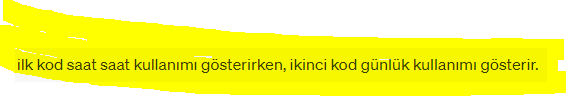

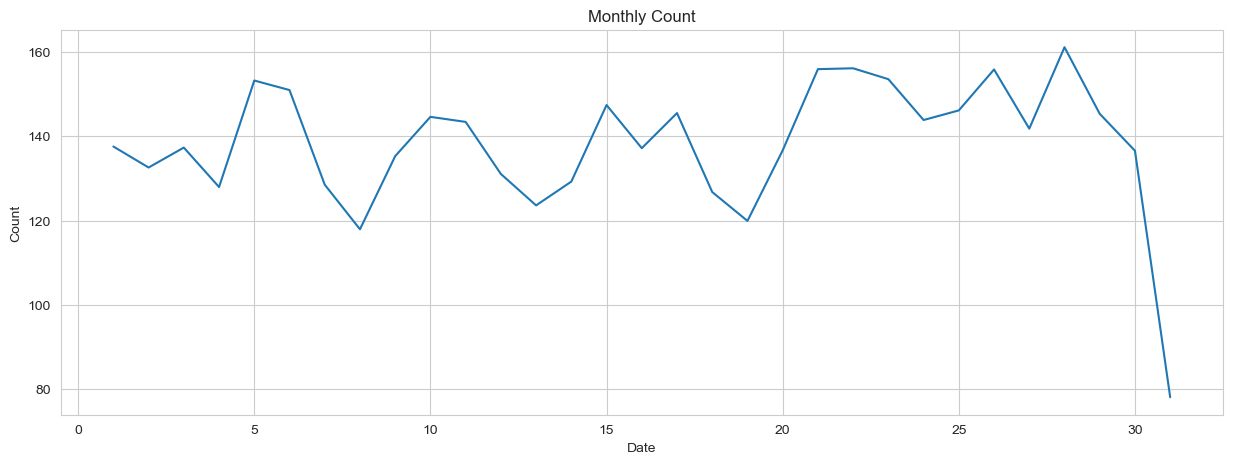

In [75]:
date_cnt = df.groupby("day")["Watch time (hours)"].sum()   # Görseli sadeleştirmek için groupby ile günlük kullanımı

plt.figure(figsize=(15, 5))
sns.lineplot(x=date_cnt.index, y=date_cnt.values)

plt.xlabel("Date")
plt.ylabel("Count")
plt.title("Monthly Count")
plt.show()

***ii. Plot watching hours shares by months***

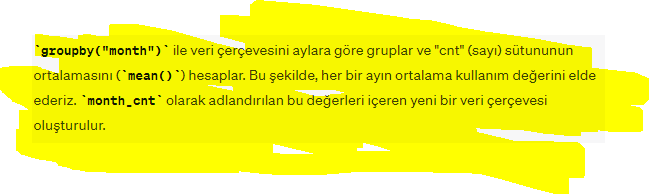

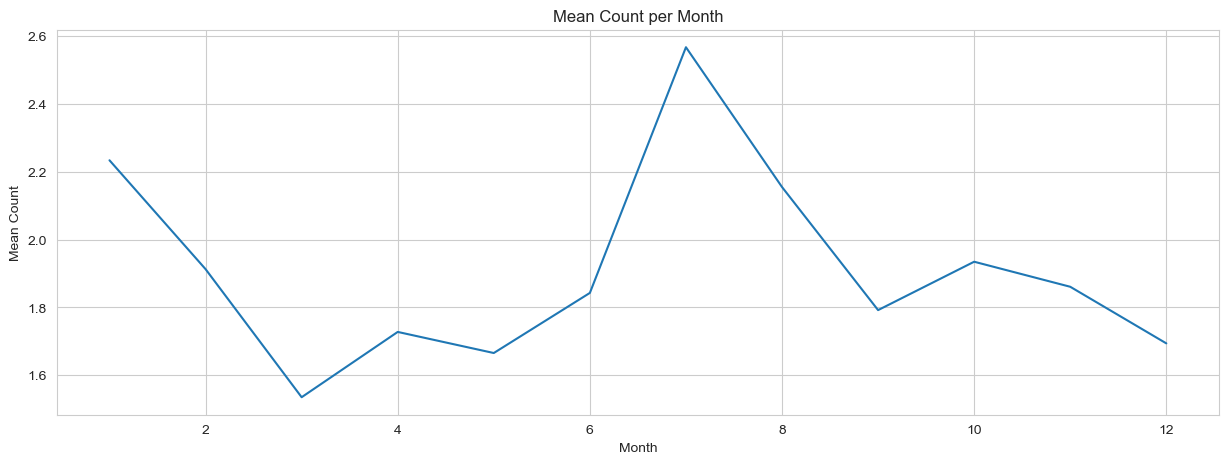

In [76]:
month_cnt = df.groupby("month")["Watch time (hours)"].mean()

plt.figure(figsize=(15, 5))
sns.lineplot(x=month_cnt.index, y=month_cnt.values)

plt.xlabel("Month")
plt.ylabel("Mean Count")
plt.title("Mean Count per Month")

plt.show()

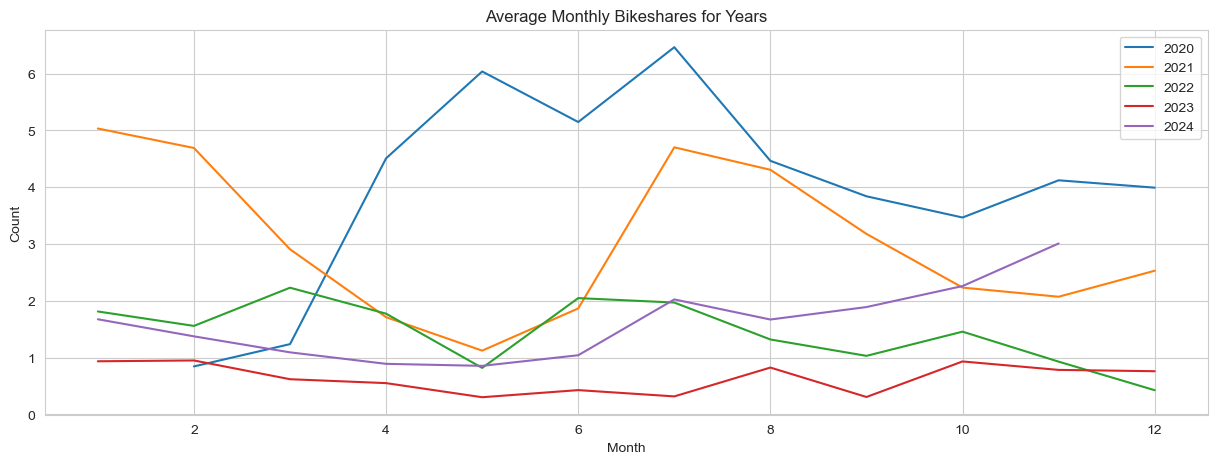

In [77]:
year_month_cnt = df.groupby(["year", "month"])["Watch time (hours)"].mean()    # yıllara sari bir şekilde görmek istersek bunu yapıyoruz.

plt.figure(figsize=(15,5))        #2017 de çok az veri olduğu için burada göremiyoruz. 
for year in year_month_cnt.index.levels[0]:
    plt.plot(year_month_cnt[year].index, year_month_cnt[year],label=year)

plt.legend()
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Average Monthly Bikeshares for Years')
plt.show()

groupby(["year", "month"]) ile veri çerçevesini yıllara ve aylara göre gruplar ve "cnt" (sayı) sütununun ortalamasını (mean()) hesaplar. Bu şekilde, her bir yılın her bir ay için ortalama kullanım değerini elde ederiz. year_month_cnt olarak adlandırılan bu değerleri içeren yeni bir veri çerçevesi oluşturulur.

Sonrasında, plt.figure(figsize=(15,5)) ile grafiğin boyutu belirlenir. for year in year_month_cnt.index.levels[0]: döngüsü ile her bir yılı dönerek, plt.plot(year_month_cnt[year].index, year_month_cnt[year],label=year) ile her bir yılın her bir ay için ortalama kullanım değerini içeren çizgi grafiği çizdiririz. Bu şekilde, yıllara göre aylık kullanımın değişimini ve yıllar arasındaki karşılaştırmayı görselleştiririz.

Özetle, veriyi yıllara ve aylara göre gruplayarak her bir yılın her bir ay için ortalama kullanımını hesaplayıp çizgi grafiği ile göstermiş oluyoruz. Bu sayede yıllar ve aylar arasındaki kullanım eğilimini inceleyebilir ve yıllar arasındaki karşılaştırmayı yapabiliriz.

***iii. Plot bike shares by hours***
- *whether it is a holiday or not*
- *You may want to see seasonal breakdowns*

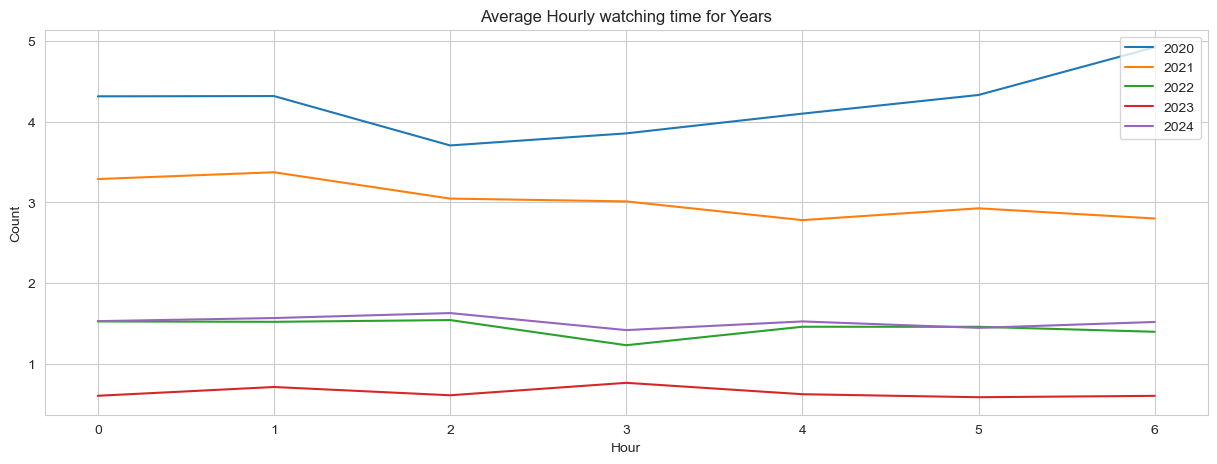

In [78]:
year_hour_cnt = df.groupby(["year", "dayofweek"])["Watch time (hours)"].mean()

plt.figure(figsize=(15,5))
for year in year_month_cnt.index.levels[0]:
    plt.plot(year_hour_cnt[year].index, year_hour_cnt[year],label=year)

plt.legend()
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Average Hourly watching time for Years')
plt.show()

sıcak havalarda daha fazla bisiklete binildiği görülmüş oluyor.

***iv. Plot watching hours by day of week***


hafta içi daha fazla hafta sonu bisiklet kullanımı daha az olarak gözükmektedir. 

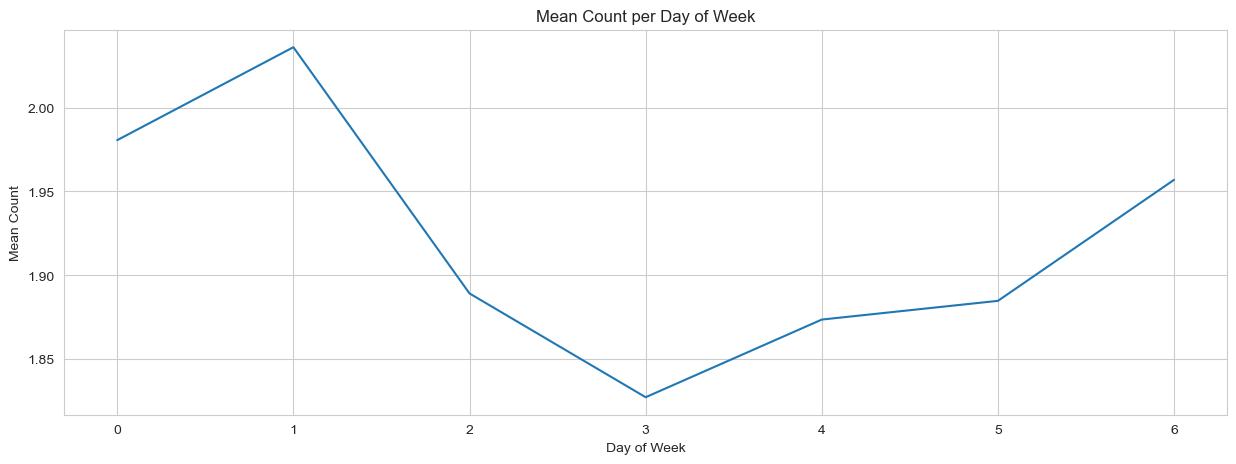

In [79]:
weekday_cnt = df.groupby("dayofweek")["Watch time (hours)"].mean()

plt.figure(figsize=(15, 5))
sns.lineplot(x=weekday_cnt.index, y=weekday_cnt.values)

plt.xlabel("Day of Week")
plt.ylabel("Mean Count")
plt.title("Mean Count per Day of Week")

plt.show()

### Drop unnecessary columns

- Check correlations via heatmap
- Check weather_code
- Think about time-based features and decide dropping which is unnecessary for the model

In [80]:
df = df["Watch time (hours)", ]

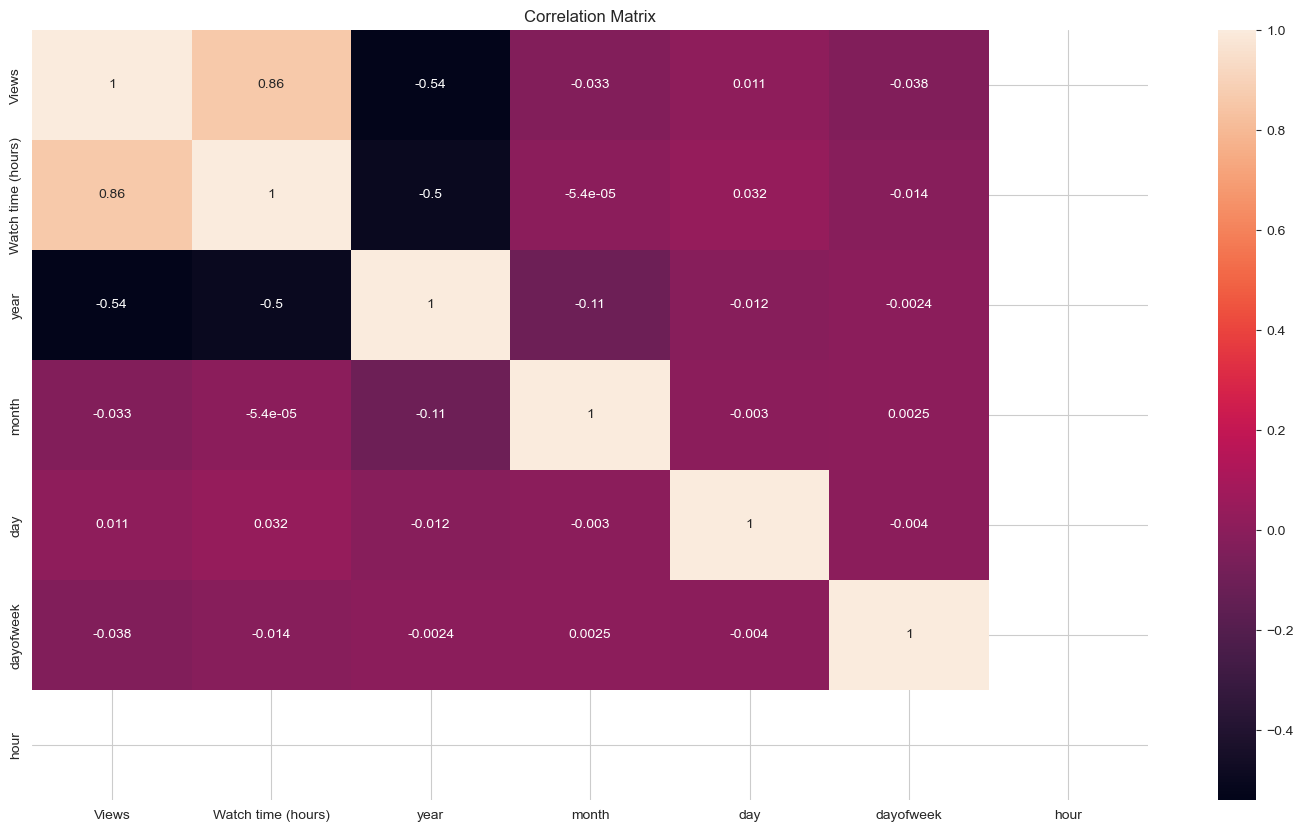

In [81]:
numerical_df = df.select_dtypes(include=[np.number])

# Korelasyon matrisini oluşturalım
correlation_matrix = numerical_df.corr()

# Korelasyon matrisini görselleştirelim
plt.figure(figsize=(18,10))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()


In [82]:
df.head()

,Views,Watch time (hours),year,month,day,dayofweek,hour
Date,,,,,,,
2021-01-01,34.000,2.152,2021,1,1,4,0
2020-12-31,13.000,0.475,2020,12,31,3,0
2020-12-30,47.000,2.580,2020,12,30,2,0
2020-12-29,78.000,3.535,2020,12,29,1,0
2020-12-28,158.000,7.245,2020,12,28,0,0


Time Series datalar da ilgisiz sütunlar genel itibari ile düşülür.

## 2. Data Pre-Processing

### Train - Test Split

Appropriately split the data for optimum training.

In [83]:
df.shape

(2228, 7)

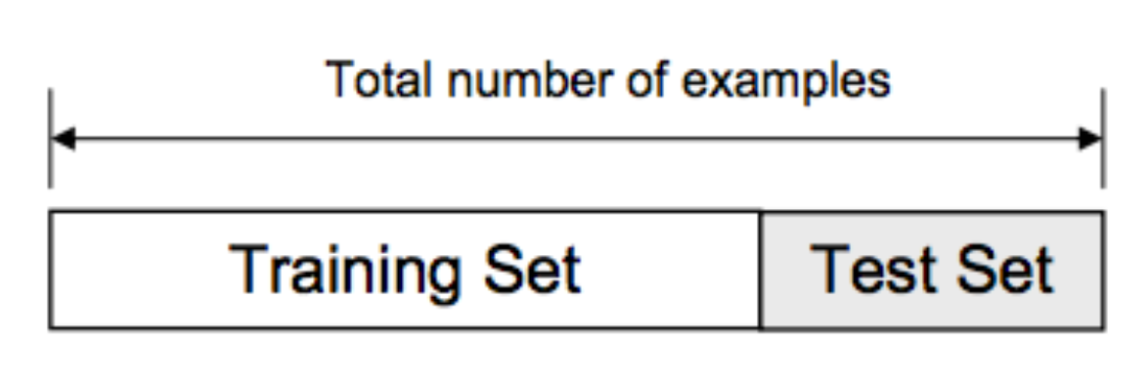

In [84]:
train_size = int(len(df) * 0.9)
test_size = len(df) - train_size

train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

2005 223


In [85]:
train.shape

(2005, 7)

In [86]:
test.shape

(223, 7)

### Scaling

**Robust Scaling**

It is common to scale data prior to fitting a machine learning model.

This is because data often consists of many different input variables or features (columns) and each may have a different range of values or units of measure, such as feet, miles, kilograms, dollars, etc.

If there are input variables that have very large values relative to the other input variables, these large values can dominate or skew some machine learning algorithms. The result is that the algorithms pay most of their attention to the large values and ignore the variables with smaller values.

LSTMs are sensitive to the scale of the input data, specifically when the sigmoid (default) or tanh activation functions are used. It can be a good practice to rescale the data to the range of 0-to-1, also called normalizing. You can easily normalize the dataset using the Robust Scaling preprocessing class from the scikit-learn library.

- ***Note:*** *You are expected to scale only 't1'/'t2', 'hum', 'wind_speed' variables. You also need to scale the dependent and independent variables separately. You must do this for both train data and test data.*

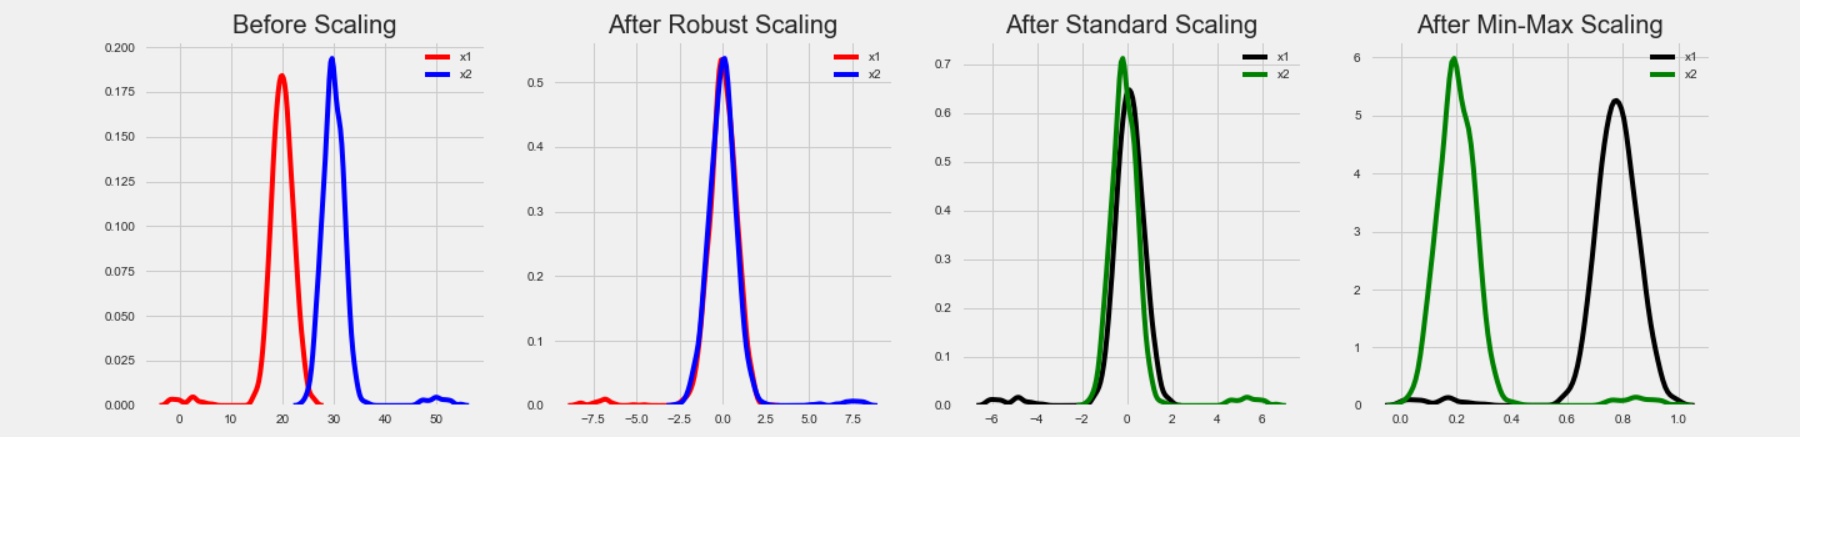

In [87]:
from sklearn.preprocessing import RobustScaler

Robust Scaling, verilerin ortanca ve yüzdelik dilimlere dayalı olarak ölçeklendirilmesini sağlar. Bu nedenle, aykırı değerlerin etkisi azaltılır ve LSTM modelinin daha dengeli bir şekilde eğitilmesine yardımcı olur.

Tek feature olduğu zaman; tüm datayı minmax yapmış, sonrasında feature ın train datasını fit ve transfer yaparken, test olan datasını ise sadece fit yapmıştık. 

Dummy yapmış olduğumuz feature leri scale e dahil etmeyeceğiz. ZATEN 0 İLE 1 ARASINDA YER ALDIKLARI İÇİN. 

In [88]:
df.columns

Index(['Views', 'Watch time (hours)', 'year', 'month', 'day', 'dayofweek',
       'hour'],
      dtype='object')

Daha sonra sadece Target sütunumuzu INVERSE TRANSFORM yapacağımız için bunu burada ayırmamız gerekiyor ve ona ayrı bir scale yapmamamız gerekiyor. Tek feature de şu şekilde idi:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

In [41]:
f_columns = ['Watch time (hours)', 'Views', 'wind_speed']

f_transformer = RobustScaler()   # feature ler için kullanılan scale
target_transformer = RobustScaler()   # target için kullanılan scale

train.loc[:, f_columns] = f_transformer.fit_transform(train[f_columns])
#  train.loc[:, f_columns] ifadesi, train veri setindeki tüm satırları ve f_columns listesinde belirtilen sütunları seçer
train['cnt'] = target_transformer.fit_transform(train[['cnt']])

test.loc[:, f_columns] = f_transformer.transform(test[f_columns])
#test.loc[:, f_columns] ifadesi, test veri setindeki tüm satırları ve f_columns listesinde belirtilen sütunları seçer. 

test['cnt'] = target_transformer.transform(test[['cnt']])

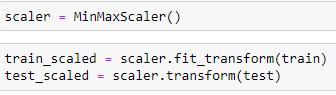

### Define a Function for Creating Time Steps 

In order to use the capabilities of LSTM, we need to organize the data in accordance with the working principles of LSTM.
You must separate the lines ordered by time in decimal steps.
The size of the step may vary depending on the situation, in this case it is set to 10.

Therefore, train and test data should be divided into groups of ten.
When predicting test data, the model is asked to use the information from the next 10 records with itself for each record.

As a result of this operation, each row will create a time step with the next 10 records, and you will have a matrix consisting of steps as many as the row total at the beginning.
So, your data set must be a 3-dimensional numpy array like (15662, 10,13).
As a result, LSTM will learn by taking 10 rows into account for one row.

Create a function, that takes two arguments: the dataset(dependent or independent variables separately), which is a NumPy array that we want to convert into a dataset, and the time_steps, which is the number of previous time steps to use as input variables to predict the next time period.

After defining the function, apply it to train and test sets.

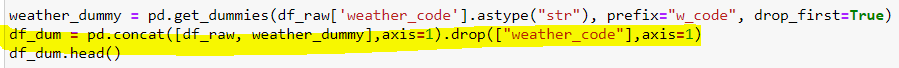

In [42]:
train

,cnt,t1,hum,wind_speed,is_holiday,is_weekend,w_code_10.0,w_code_2.0,w_code_26.0,w_code_3.0,w_code_4.0,w_code_7.0
timestamp,,,,,,,,,,,,
2015-01-04 00:00:00,-0.465,-1.250,0.975,-0.818,0.000,1.000,False,False,False,True,False,False
2015-01-04 01:00:00,-0.495,-1.250,0.975,-0.909,0.000,1.000,False,False,False,False,False,False
2015-01-04 02:00:00,-0.498,-1.312,1.150,-1.364,0.000,1.000,False,False,False,False,False,False
2015-01-04 03:00:00,-0.541,-1.375,1.325,-1.364,0.000,1.000,False,False,False,False,False,False
2015-01-04 04:00:00,-0.558,-1.375,0.975,-0.773,0.000,1.000,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-10-23 03:00:00,-0.441,-0.625,0.825,-0.818,0.000,1.000,False,True,False,False,False,False
2016-10-23 04:00:00,-0.487,-0.625,0.975,-0.818,0.000,1.000,False,True,False,False,False,False
2016-10-23 05:00:00,-0.517,-0.625,0.675,-1.000,0.000,1.000,False,False,False,True,False,False


In [43]:
def create_dataset(X, y, time_steps=1):  # buraya X ve y train i vereceğiz.
   
    Xs, ys = [], []   # 2 tane boş liste oluşturuyor ve bunlara X ve y train leri atayacağız. 
    for i in range(len(X) - time_steps):      # length i ne ise oraya kadar gidecek.
        v = X.iloc[i:(i + time_steps)].values # her döngüde bana verdiğim train data sını O İLE 1 arasını value yani data frame olarak al
        Xs.append(v)                          # bu değeri ilk listenin içine at. paketler halinde atacak.. 0.24, 1-25 etc..
        ys.append(y.iloc[i + time_steps])   # bu sefer i (0) + 23 (indes) yani 24 nci datayı y ye koy
    return np.array(Xs), np.array(ys)  # daha sonra bunları array e çevir..

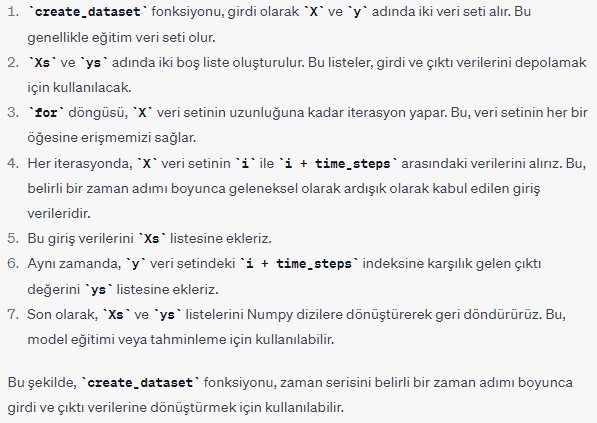

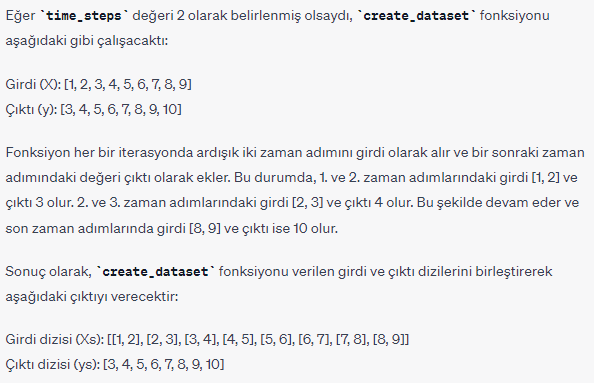

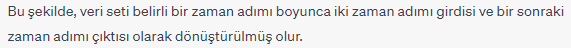

Yukarida olusturdugumuz create_dataset fonksyionunu kullanarak X_train ve y_train' i olusturduk.

In [44]:
time_steps = 24  

X_train, y_train = create_dataset(train, train.cnt, time_steps)
X_test, y_test = create_dataset(test, test.cnt, time_steps)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# reshape to [samples, time_steps, n_features]

(15648, 24, 12) (15648,)
(1718, 24, 12) (1718,)


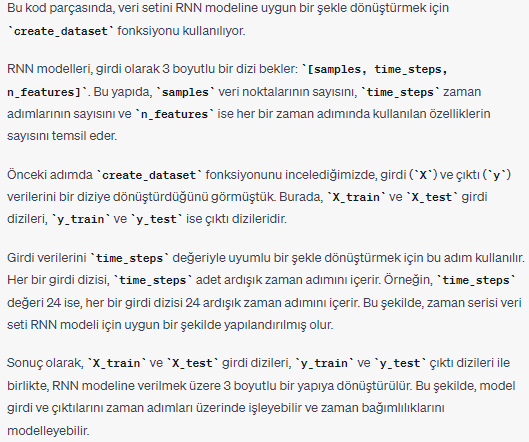

In [45]:
X_train

array([[[-0.46487603305785125, -1.25, 0.975, ..., True, False, False],
        [-0.4951790633608815, -1.25, 0.975, ..., False, False, False],
        [-0.49793388429752067, -1.3125, 1.15, ..., False, False, False],
        ...,
        [-0.4380165289256198, -1.25, 0.975, ..., False, True, False],
        [-0.46763085399449034, -1.25, 0.975, ..., False, True, False],
        [-0.4820936639118457, -1.125, 0.675, ..., False, True, False]],

       [[-0.4951790633608815, -1.25, 0.975, ..., False, False, False],
        [-0.49793388429752067, -1.3125, 1.15, ..., False, False, False],
        [-0.540633608815427, -1.375, 1.325, ..., False, False, False],
        ...,
        [-0.46763085399449034, -1.25, 0.975, ..., False, True, False],
        [-0.4820936639118457, -1.125, 0.675, ..., False, True, False],
        [-0.5330578512396694, -1.125, 0.975, ..., False, True, False]],

       [[-0.49793388429752067, -1.3125, 1.15, ..., False, False, False],
        [-0.540633608815427, -1.375, 1.325

In [46]:
X_train[0]

array([[-0.46487603305785125, -1.25, 0.975, -0.8181818181818182, 0.0,
        1.0, False, False, False, True, False, False],
       [-0.4951790633608815, -1.25, 0.975, -0.9090909090909091, 0.0, 1.0,
        False, False, False, False, False, False],
       [-0.49793388429752067, -1.3125, 1.15, -1.3636363636363635, 0.0,
        1.0, False, False, False, False, False, False],
       [-0.540633608815427, -1.375, 1.325, -1.3636363636363635, 0.0, 1.0,
        False, False, False, False, False, False],
       [-0.5578512396694215, -1.375, 0.975, -0.7727272727272727, 0.0,
        1.0, False, False, False, False, False, False],
       [-0.5585399449035813, -1.375, 0.975, -1.0, 0.0, 1.0, False, False,
        False, False, False, False],
       [-0.5550964187327824, -1.5, 1.325, -0.7272727272727273, 0.0, 1.0,
        False, False, False, False, True, False],
       [-0.5385674931129476, -1.5, 1.325, -0.7272727272727273, 0.0, 1.0,
        False, False, False, False, True, False],
       [-0.5, -

In [47]:
y_train[0]

-0.5330578512396694

In [48]:
X_test

array([[[-0.37052341597796146, -0.625, 0.675, ..., False, False, False],
        [-0.07782369146005509, -0.4375, 0.275, ..., False, False, False],
        [0.34573002754820936, -0.3125, 0.025, ..., True, False, False],
        ...,
        [-0.5034435261707989, -0.375, 0.275, ..., False, False, False],
        [-0.18732782369146006, -0.3125, 0.3, ..., False, False, True],
        [0.768595041322314, -0.25, 0.3, ..., False, False, False]],

       [[-0.07782369146005509, -0.4375, 0.275, ..., False, False, False],
        [0.34573002754820936, -0.3125, 0.025, ..., True, False, False],
        [0.7183195592286501, -0.125, -0.2, ..., False, False, False],
        ...,
        [-0.18732782369146006, -0.3125, 0.3, ..., False, False, True],
        [0.768595041322314, -0.25, 0.3, ..., False, False, False],
        [2.1542699724517904, -0.25, 0.175, ..., False, False, False]],

       [[0.34573002754820936, -0.3125, 0.025, ..., True, False, False],
        [0.7183195592286501, -0.125, -0.2, ..

In [49]:
y_test[0]

2.1542699724517904

---
---

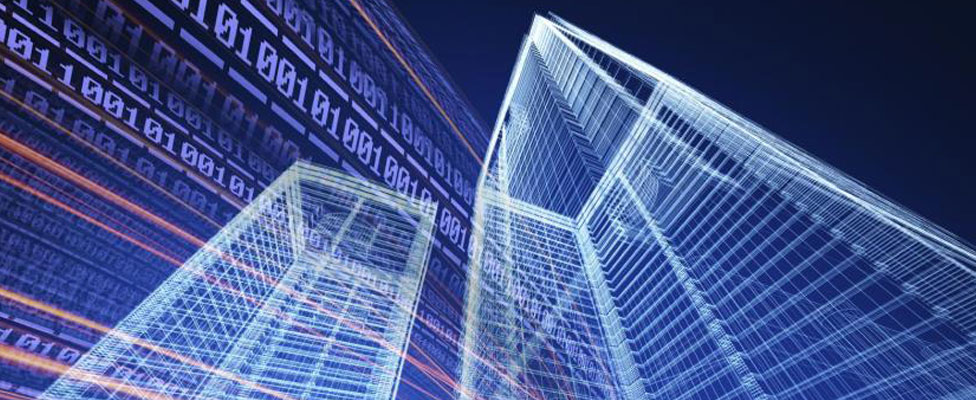

## 3. Model Building with LSTM



##Recurrent Neural Networks 
RNN are a type of artifcial neural network designed to recognize patterns in sequences of data, such as text, genomes, handwriting, the spoken word, numerical times series data.

Recurrent Neural Networks use backpropagation algorithm for training. Because of their internal memory, RNN’s are able to remember important things about the input they received, which enables them to be very precise in predicting what’s coming next.

RNNs could be stacked up to deeper versions, which contain more than 1 layers of RNN. Because RNNs are especially computationally expensive to train, normally a deep RNN model contains no more than 3 layers of LSTM.

Train a bidirectional long short term memory (LSTM) recurrent neural network (RNN) with this data, making use of the self-loop and forget gate of LSTM.

LSTM sequential learning model was chosen because of its ability to process sequential data and memorize data of past time steps.

LSTM is a different type of gated RNN which is capable of learning long-term dependencies LSTM is not affected by vanishing gradient or exploding gradient problem
Using Bidirectional LSTMs, we feed the learning algorithm with the original data once from beginning to the end and once from end to beginning.

#### Bidirectional LSTM :
Bidirectional LSTMs are an extension of traditional LSTMs that can improve model performance on sequence classification problems.

In problems where all timesteps of the input sequence are available, Bidirectional LSTMs train two instead of one LSTMs on the input sequence. The first on the input sequence as-is and the second on a reversed copy of the input sequence. This can provide additional context to the network and result in faster and even fuller learning on the problem. Figure shows the mechanism of Bidirectional LSTM.






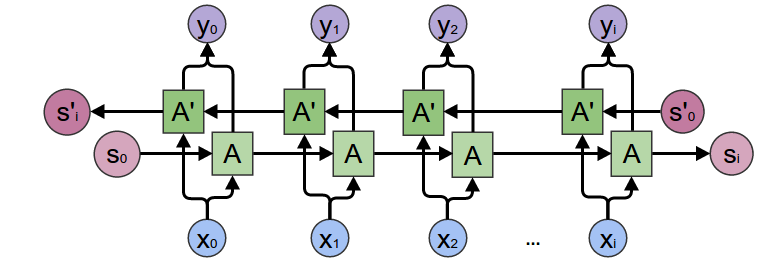

### Create, Compile and Fit Bidirectional LSTM Model

- Create a Sequential Model,
- Add Bidirectional layers,
- Apply Regularization (Drop Out),
- Compile the model.

***Note:*** *Define the optimizer as the efficient stochastic gradient descent algorithm ***adam***.* *This is a popular version of gradient descent because it automatically tunes itself and gives good results in a wide range of problems.*

*In this case, use ***mean squared error*** as the loss argument. This loss is for a regression problems and is defined in Keras as mean_squared_error.
Also use defined in Keras as ***accuracy*** as the metrics.*

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [51]:
X_train.shape

(15648, 24, 12)

Modelin genişliğini arttırmaktansa deep liğini arttırmakta fayda var.

Burada X_train.shape[2] ifadesindeki 2, X_train veri setinin boyutlarından üçüncü boyutu ifade etmektedir.

Genellikle, makine öğrenimi problemlerinde veri setleri 2D (örneğin, tablo şeklinde) veya 3D (örneğin, görüntü veya zaman serisi verileri) şeklinde olabilir. 3D veri setlerinde, veriler bir dizi olarak temsil edilir ve üçüncü boyut, veri noktalarının farklı özelliklerini temsil eder.

Örneğin, bir zaman serisi veri seti düşünelim. Her bir veri noktası, zaman adımlarında ölçülen değerlerden oluşur. Bu durumda, X_train veri setinin şekli (örneğin) (100, 10, 3) olabilir. Burada 100, veri noktalarının sayısını, 10, her bir veri noktasında zaman adımlarının sayısını ve 3, her bir zaman adımında ölçülen özelliklerin sayısını temsil eder.

Bu nedenle, X_train.shape[2] ifadesi, X_train veri setinin üçüncü boyutunun boyutunu verir, yani her bir veri noktasında bulunan özelliklerin sayısını temsil eder.

In [52]:
y_train.shape

(15648,)

In [53]:
n_features = X_train.shape[2]

In [54]:
print(n_features)

12


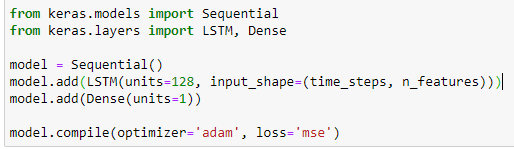

In [55]:
model = Sequential()
model.add(Bidirectional(LSTM(units=128, input_shape=(time_steps, n_features))))   #24 e 12 lik bir veri bekleyecek benden
#BIDIRECTIONAL ın yaptığı iş burada; (düz ve ters toplamı)
# 24 lük serilerimi önce 1 den 24 e kadar al sonra 24 den geriye doğru al ve bu ikisinin toplamının sonuçlarını bir sonraki katmana aktar. 
#model.add(Dropout(rate=0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mse')

In [56]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)

restore_best_weights=True parametresi, eğitim sırasında erken durdurma (early stopping) kullanıldığında en iyi performans gösteren modelin ağırlıklarının geri yüklenmesini sağlar.

Erken durdurma, modelin eğitim sürecini kontrol etmek için kullanılan bir yöntemdir. Eğitim ilerledikçe, genellikle eğitim hatası (loss) azalırken doğrulama hatası artar. Ancak, doğrulama hatasının artması, modelin aşırı uyum (overfitting) yapabileceğini ve genelleme yeteneğinin azaldığını gösterebilir.

Erken durdurma, belirli bir sabır (patience) değerini belirleyerek doğrulama hatasının belirli bir süre boyunca azalmaması durumunda eğitimi durdurur. Bu, aşırı uyumu önlemek ve daha iyi bir genelleme yapmak için kullanışlı bir yöntemdir.

restore_best_weights=True parametresi, erken durdurma işlemi sonunda en iyi performans gösteren modelin ağırlıklarının geri yüklenmesini sağlar. Bu şekilde, erken durdurmaya karar verilen noktada kaydedilen en iyi modelin ağırlıkları kullanılır. Böylece, model eğitimi durdurulduğunda en iyi performans elde edilen noktada kalır ve bu ağırlıklar kullanılarak tahmin yapılır.

Bu yöntem, genellikle aşırı uyumu önlemek ve daha iyi bir genelleme yapmak için kullanılır.

In [57]:
#patience=5 dediğimizde sondan 5'nci değer benim en iyi değerim..
# en iyi ağırlığın olduğu yeri al diyoruz restore_best_weights ile..bunu demez isek en sondakini alır.. 
# ama en iyi değer farklı bir yerde de olabilir. en sondaki en iyiye göre düşük olacaktır muhtemelen.. 

In [58]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

 RNN'de validation_split kullanımı, veri setini rastgele bölerken sıralamayı bozmaz ve zaman serileri üzerinde doğru sonuçlar elde etmek için uygun bir yaklaşımdır.

In [59]:
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')

In [60]:
X_test = X_train.astype('float32')
y_test = y_train.astype('float32')

In [61]:
model.fit(X_train, y_train, 
          epochs=30, 
          batch_size=32, 
          validation_split=0.3,
          callbacks=[early_stop])

Epoch 1/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - loss: 0.1941 - val_loss: 0.0896
Epoch 2/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - loss: 0.0531 - val_loss: 0.0482
Epoch 3/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - loss: 0.0301 - val_loss: 0.0326
Epoch 4/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - loss: 0.0218 - val_loss: 0.0262
Epoch 5/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - loss: 0.0200 - val_loss: 0.0259
Epoch 6/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - loss: 0.0171 - val_loss: 0.0249
Epoch 7/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - loss: 0.0158 - val_loss: 0.0221
Epoch 8/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - loss: 0.0150 - val_loss: 0.0219
Epoch 9/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - loss: 0.0132 - val_loss: 0.0229
Epoch 10/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - loss: 0.0156 - val_loss: 0.0230
Epoch 11/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - loss: 0.0137 - val_loss: 0.0176
Epoch 12/30
343/343 ━━━━━━━━━━━━━━━━━━━━

<Axes: >

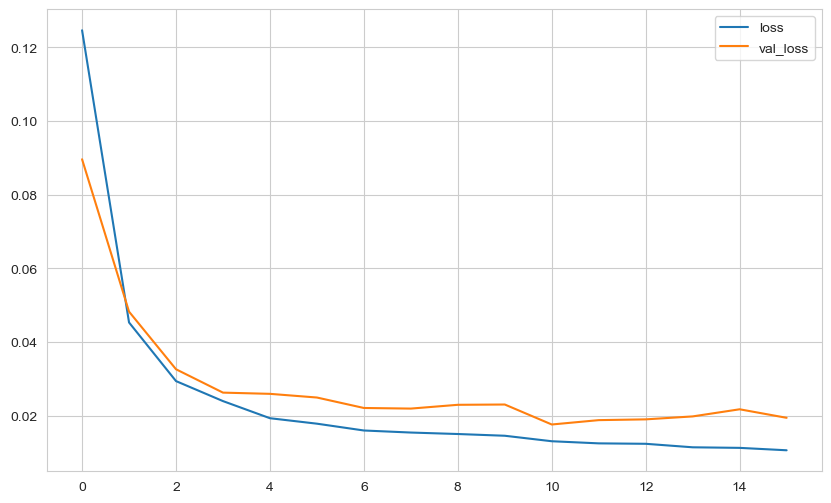

In [62]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

---
---

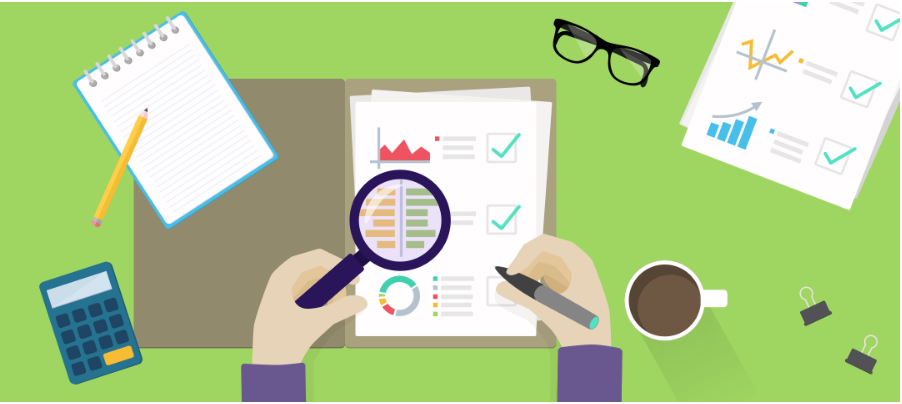

## 4. Evaluate on Test Data

At this stage, you will measure the prediction success of your model. So, you will need to compare the actual values of the test data with their predicted values. 

For this reason, you must inverse transform the y_pred variable predicted by the model with the target variables of the train and test data you have previously scaled.

Check scores with both scaled results and inversed results

Plot predictions and actula values together

In [63]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [64]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [65]:
y_pred = model.predict(X_test)

489/489 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step


In [66]:
eval_metrics(y_test, y_pred)

r2_score: 0.9779302282157869 
mae: 0.06832067 
mse: 0.012653353 
rmse: 0.11248712


### Inverse Transformation and Compare

In [67]:
y_train_inv = target_transformer.inverse_transform(y_train.reshape(1, -1))   # reshape ile tek satır haline getirmiş oluyoruz
y_test_inv = target_transformer.inverse_transform(y_test.reshape(1, -1))     # kaç sütun ise o kadar sütun olacak
y_pred_inv = target_transformer.inverse_transform(y_pred)

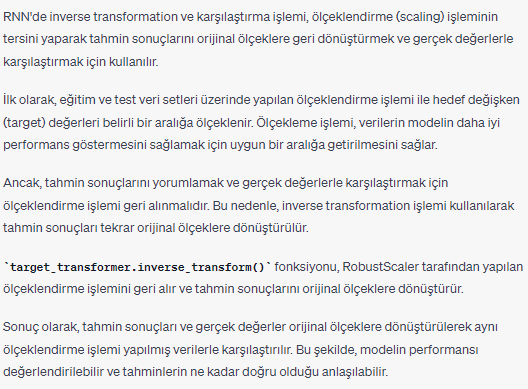

In [90]:
test_index = test.iloc[time_steps:].index

pred_test = pd.concat([pd.DataFrame(y_test_inv.reshape(-1, 1)),
                       pd.DataFrame(y_pred_inv)], axis = 1)
pred_test.columns=['test','prediction']
#pred_test.index = test_index

Bu kod, test verileri ile yapılan tahminlerin sonuçlarını düzenlemek için kullanılıyor. İşte bu kodun adım adım açıklaması:

İlk satırda, test veri çerçevesinin time_steps zaman adımı sonrasındaki indeksleri test_index adlı bir değişkene atanır. Bu, tahminlerin test verileri üzerinde yapılacağı zaman aralığını belirlemeye yardımcı olur.

İkinci satırda, tahmin sonuçlarını içeren y_test_inv ve y_pred_inv dizileri, bir veri çerçevesine dönüştürülür. y_test_inv, gerçek test verilerinin ters çevrilmiş (örneğin, ölçeklendirmenin ters çevrilmiş hali) halidir ve y_pred_inv, modelin yaptığı tahminlerin ters çevrilmiş hali olarak kabul edilir.

Üçüncü satırda, pd.concat fonksiyonu kullanılarak y_test_inv ve y_pred_inv veri çerçeveleri bir araya getirilir. Bu, tahminlerin gerçek test verileri ile birleştirilmesini sağlar.

Dördüncü satırda, sütun adları test ve prediction olarak ayarlanır. Bu adımlar sonucunda, pred_test adlı yeni bir veri çerçevesi oluşturulur.

Beşinci satırda, pred_test veri çerçevesinin indeksi test_index ile değiştirilir. Bu, verilerin uygun sırayla düzenlenmesini sağlar.

Sonuç olarak, pred_test veri çerçevesi, gerçek test verileri ve bu verileri kullanarak yapılan tahminlerin sonuçlarını içerir ve bu sonuçlar test_index ile düzenlenir. Bu şekilde, tahminlerin gerçek verilerle karşılaştırılması ve değerlendirilmesi için kullanılabilir.

In [69]:
pred_test

,test,prediction
0,83.000,168.599
1,67.000,56.118
2,32.000,104.834
3,22.000,93.316
4,38.000,116.885
...,...,...
15643,217.000,332.605
15644,150.000,187.643
15645,107.000,137.221
15646,107.000,122.762


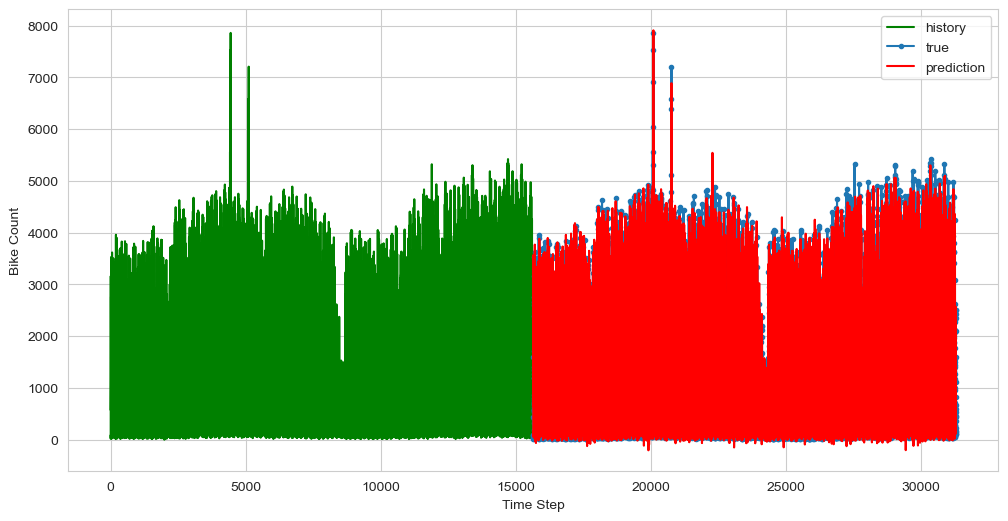

In [70]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0, len(y_train)), y_train_inv.flatten(), 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()
plt.show();

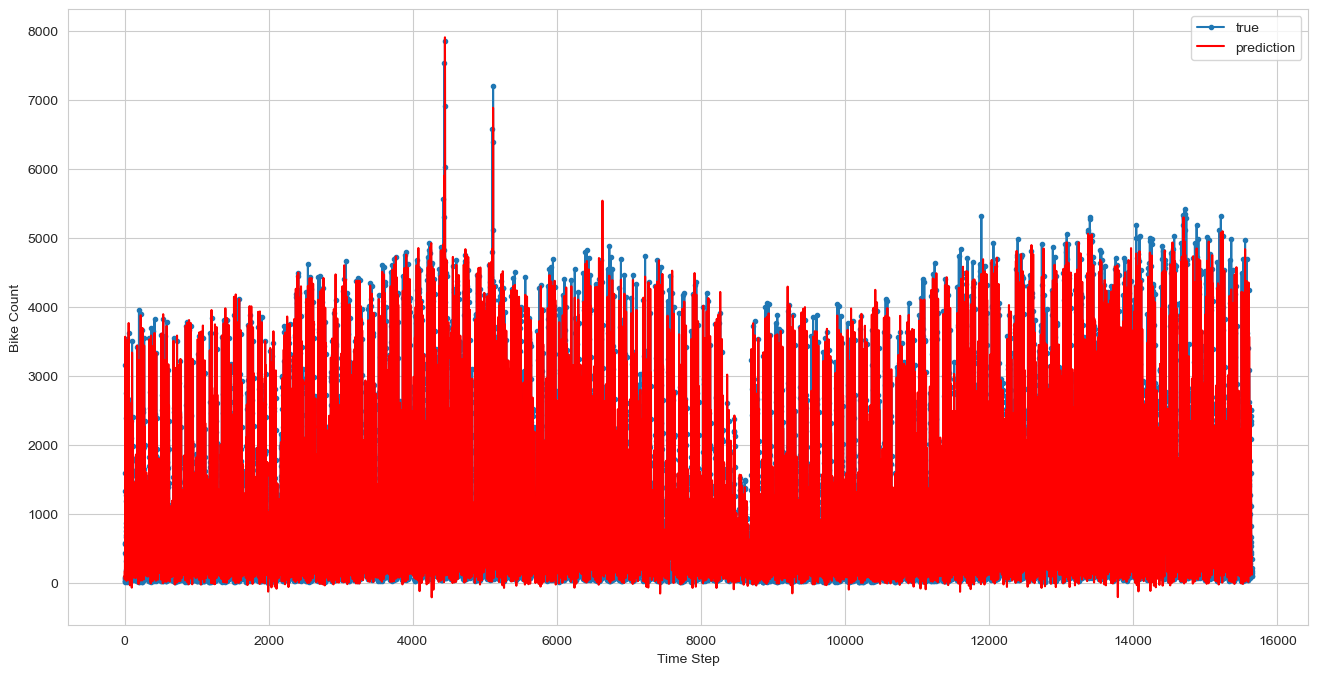

In [71]:
plt.figure(figsize=(16,8))
plt.plot(y_test_inv.flatten(), marker='.', label="true")
plt.plot(y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()
plt.show();

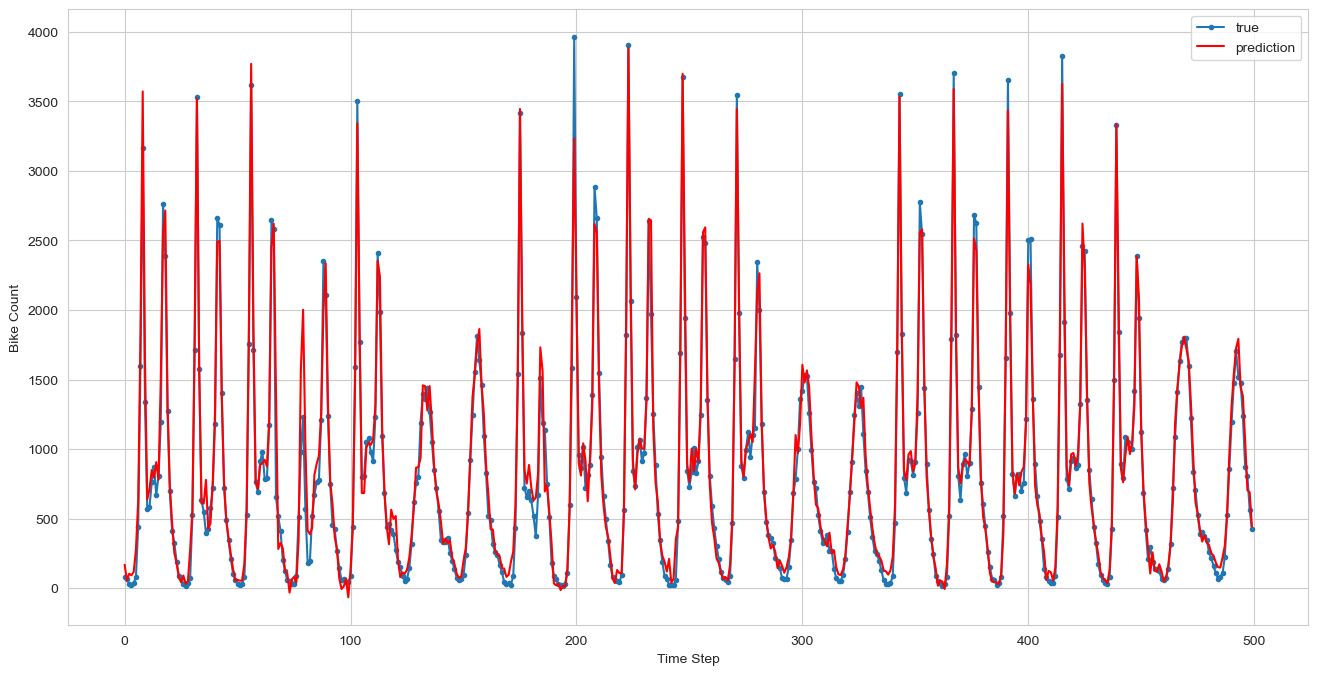

In [72]:
plt.figure(figsize=(16,8))
plt.plot(y_test_inv.flatten()[0:500], marker='.', label="true")
plt.plot(y_pred_inv.flatten()[0:500], 'r', label="prediction")
plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()
plt.show();

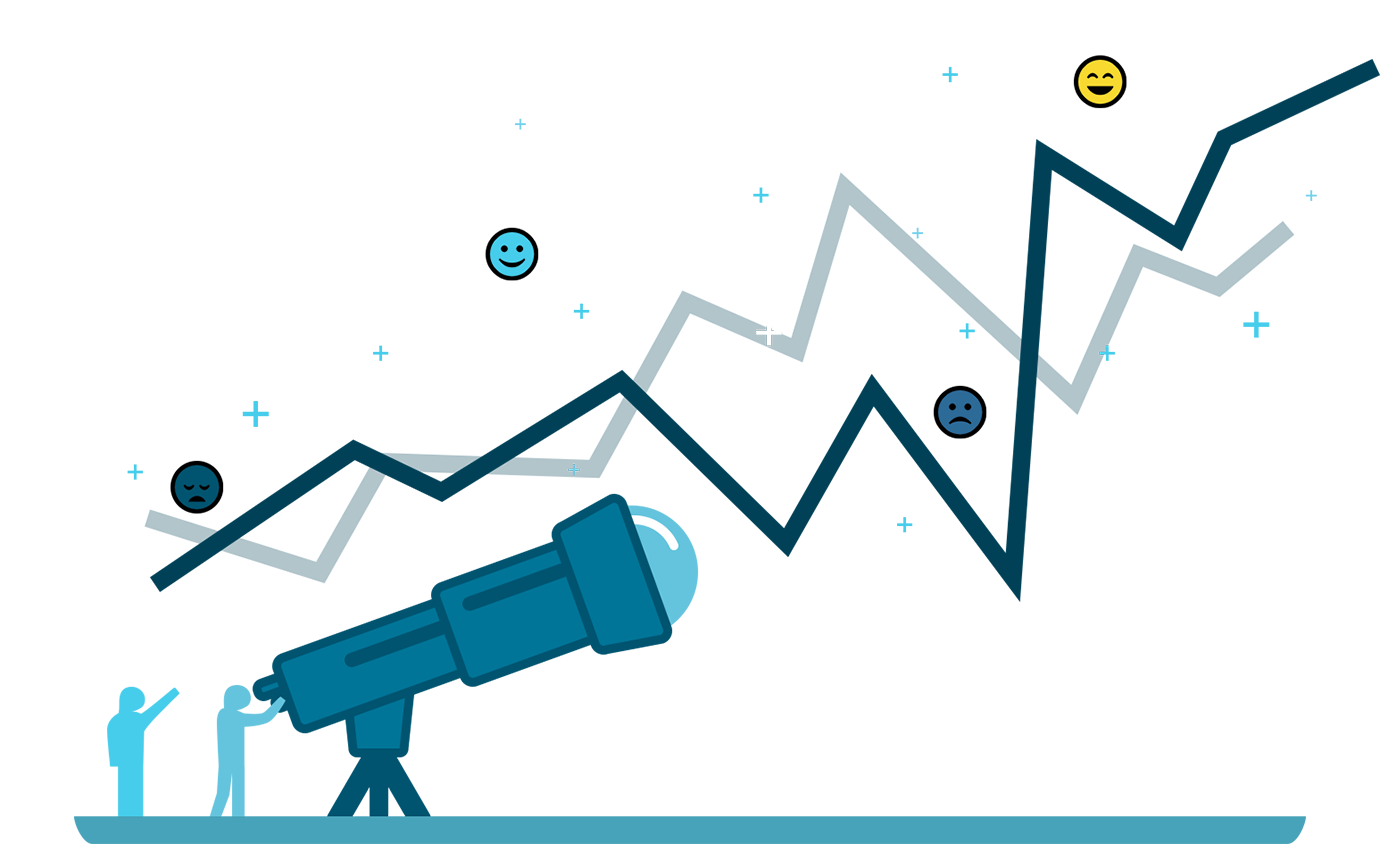

## 5. Retrain and Forecasting

### Scale full data

Let's devide dataset as "full" and "val". We can think about this "val" data as the weather forecast of next days.

In [73]:
val_size = 24
val = df_dum.iloc[-val_size:]
full = df_dum.iloc[:-val_size]
print(len(full), len(val))

17390 24


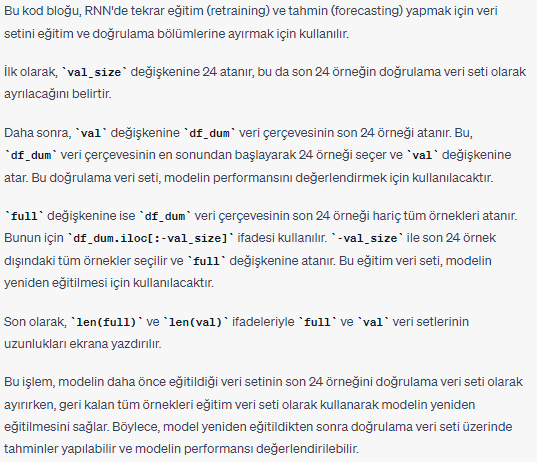

In [74]:
f_columns = ['t1', 'hum', 'wind_speed']

f_transformer = RobustScaler()
target_transformer = RobustScaler()

full.loc[:, f_columns] = f_transformer.fit_transform(full[f_columns].to_numpy())
full['cnt'] = target_transformer.fit_transform(full[['cnt']])

val.loc[:, f_columns] = f_transformer.transform(val[f_columns])
val['cnt'] = target_transformer.transform(val[['cnt']])

In [75]:
full

,cnt,t1,hum,wind_speed,is_holiday,is_weekend,w_code_10.0,w_code_2.0,w_code_26.0,w_code_3.0,w_code_4.0,w_code_7.0
timestamp,,,,,,,,,,,,
2015-01-04 00:00:00,-0.468,-1.188,0.925,-0.857,0.000,1.000,False,False,False,True,False,False
2015-01-04 01:00:00,-0.499,-1.188,0.925,-0.952,0.000,1.000,False,False,False,False,False,False
2015-01-04 02:00:00,-0.501,-1.250,1.100,-1.429,0.000,1.000,False,False,False,False,False,False
2015-01-04 03:00:00,-0.545,-1.312,1.275,-1.429,0.000,1.000,False,False,False,False,False,False
2015-01-04 04:00:00,-0.563,-1.312,0.925,-0.810,0.000,1.000,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01-02 19:00:00,-0.290,-1.188,0.325,-0.381,1.000,0.000,False,False,False,False,False,False
2017-01-02 20:00:00,-0.360,-1.188,0.025,-0.190,1.000,0.000,False,False,False,False,False,False
2017-01-02 21:00:00,-0.431,-1.250,0.175,-0.381,1.000,0.000,False,False,False,False,False,False


### reshape to [samples, time_steps, n_features]

In [76]:
X, y = create_dataset(full, full.cnt, time_steps)

print(X.shape, y.shape)

(17366, 24, 12) (17366,)


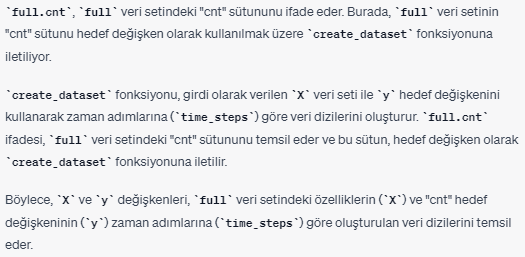

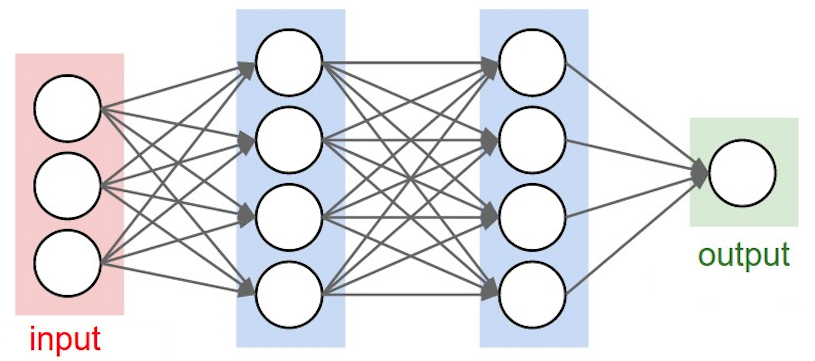

### Create Final model with full data 

In [77]:
X = X.astype('float32')
y = y.astype('float32')

In [78]:
model = Sequential()

model.add(Bidirectional(LSTM(units=128, input_shape=(time_steps, n_features))))

#model.add(Dropout(rate=0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mse')

In [79]:
model.fit(X, y, 
          epochs=20, 
          batch_size=32        
         )

Epoch 1/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - loss: 0.1997
Epoch 2/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - loss: 0.0393
Epoch 3/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - loss: 0.0255
Epoch 4/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - loss: 0.0192
Epoch 5/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - loss: 0.0183
Epoch 6/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - loss: 0.0188
Epoch 7/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - loss: 0.0150
Epoch 8/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - loss: 0.0149
Epoch 9/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - loss: 0.0132
Epoch 10/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - loss: 0.0143
Epoch 11/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - loss: 0.0119
Epoch 12/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - loss: 0.0111
Epoch 13/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - loss: 0.0132
Epoch 14/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - loss: 0.0120
Epoch 15/20
543/543 ━━━━━━━━━

<Axes: >

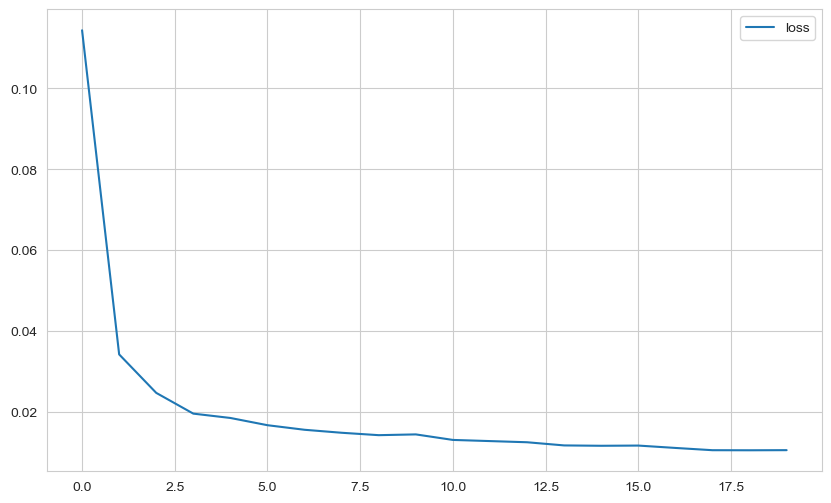

In [80]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

### forecasting

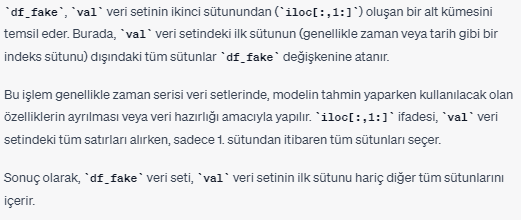

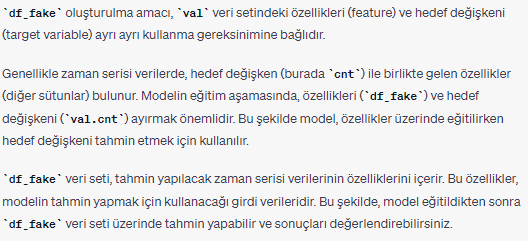

In [81]:
df_fake = val.iloc[:,1:]
df_fake

,t1,hum,wind_speed,is_holiday,is_weekend,w_code_10.0,w_code_2.0,w_code_26.0,w_code_3.0,w_code_4.0,w_code_7.0
timestamp,,,,,,,,,,,
2017-01-03 00:00:00,-1.438,0.775,-0.381,0.000,0.000,False,False,False,False,False,False
2017-01-03 01:00:00,-1.438,0.625,-0.476,0.000,0.000,False,False,False,False,False,False
2017-01-03 02:00:00,-1.500,0.775,-0.381,0.000,0.000,False,False,False,False,False,False
2017-01-03 03:00:00,-1.562,0.925,-0.190,0.000,0.000,False,False,False,False,False,False
2017-01-03 04:00:00,-1.562,0.925,-0.095,0.000,0.000,False,False,False,False,False,False
2017-01-03 05:00:00,-1.500,0.775,-0.095,0.000,0.000,False,False,False,True,False,False
2017-01-03 06:00:00,-1.438,0.625,0.286,0.000,0.000,False,False,False,False,False,False
2017-01-03 07:00:00,-1.438,0.625,0.381,0.000,0.000,False,False,False,False,False,False
2017-01-03 08:00:00,-1.438,0.625,0.333,0.000,0.000,False,False,False,True,False,False


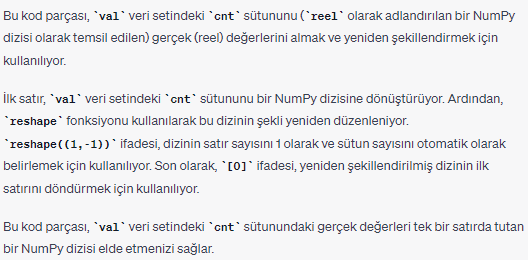

In [82]:
reel = np.array(val.iloc[:,:1])
reel.reshape((1,-1))[0]

array([-5.51553672e-01, -5.61440678e-01, -5.65677966e-01, -5.88983051e-01,
       -5.74858757e-01, -5.37429379e-01, -2.89548023e-01,  3.97598870e-01,
        1.45480226e+00,  3.62288136e-01, -1.29237288e-01, -1.46892655e-01,
       -1.34180791e-02,  2.40112994e-02, -5.57909605e-02,  7.06214689e-04,
        2.52118644e-01,  1.34039548e+00,  9.71751412e-01,  1.39830508e-01,
       -2.13983051e-01, -3.58050847e-01, -4.37853107e-01, -4.97881356e-01])

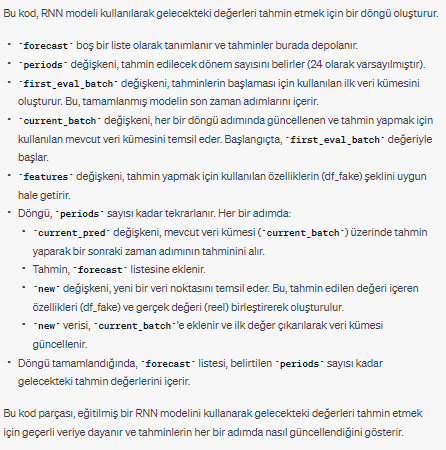

In [83]:
forecast = []
# Replace periods with whatever forecast length you want
periods = 24

first_eval_batch = full.values[-time_steps:]
current_batch = first_eval_batch.reshape((1, time_steps, full.shape[1]))
current_batch = current_batch.astype('float32')

features = df_fake.values.reshape((df_fake.shape[0], 1, df_fake.shape[1]))

for i in range(periods):
    
    # get prediction 1 time stamp ahead 
    current_pred = model.predict(current_batch)[0][0]
    
    # store prediction
    forecast.append(current_pred) 
    new = features[i][0].tolist()
    new.insert(0,reel[i][0])
    new = np.array(new).reshape(1,1,full.shape[1])
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], new, axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 639ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [84]:
eval_metrics(reel.reshape((1,-1))[0], forecast)

r2_score: 0.9200874408036461 
mae: 0.08788266797986743 
mse: 0.026174965367707994 
rmse: 0.16178678984301528


In [85]:
forecast = target_transformer.inverse_transform(np.array(forecast).reshape(1,-1))
forecast

array([[  44.351685,   17.619568,   20.404358,   79.64758 ,   64.227356,
         240.99768 ,  535.91815 , 1296.2489  , 2206.7844  , 1423.7043  ,
         626.61383 ,  578.0243  ,  713.9814  ,  675.11475 ,  729.9003  ,
         798.5351  , 1257.2545  , 1950.9774  , 2130.8557  ,  984.5521  ,
         512.85156 ,  316.38214 ,  162.55847 ,   55.38922 ]],
      dtype=float32)

In [86]:
forecast_index = pd.date_range(start = '2017-01-03 00:00:00', periods = periods, freq = 'H')

In [87]:
forecast_df = pd.DataFrame(data = forecast.reshape(-1, 1), index = forecast_index, columns = ['Forecast'])

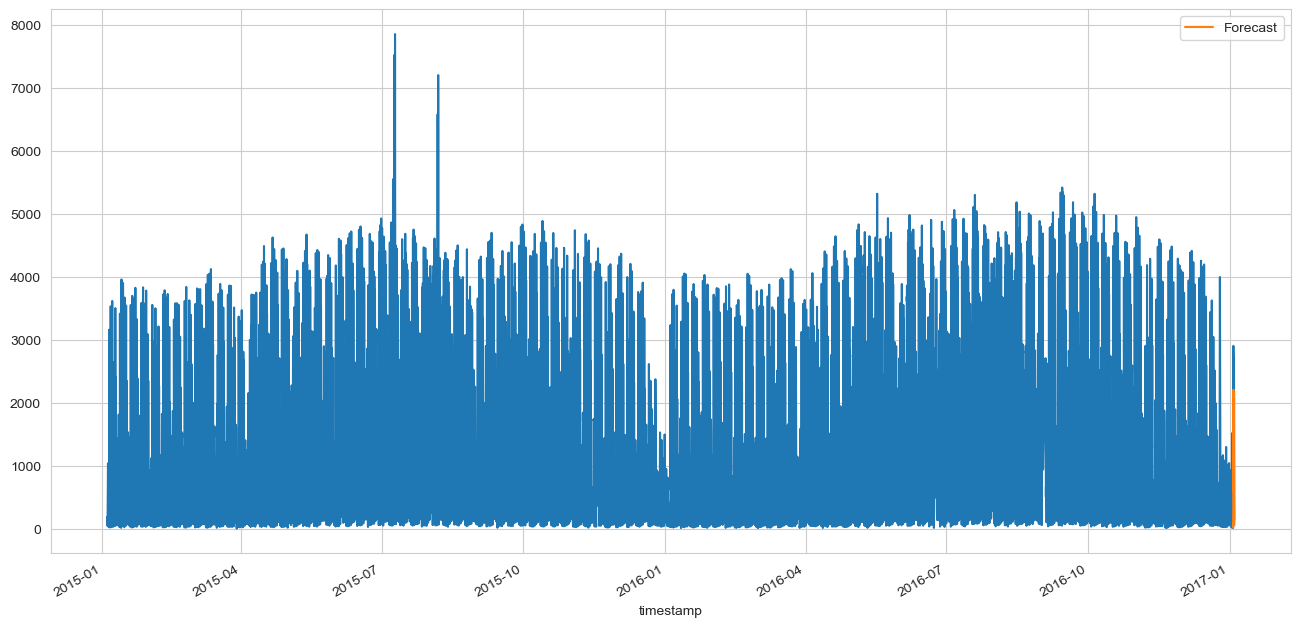

In [88]:
ax = df_raw["cnt"].plot()
forecast_df.plot(ax = ax, figsize = (16, 8));

(17167.0, 17169.958333333332)

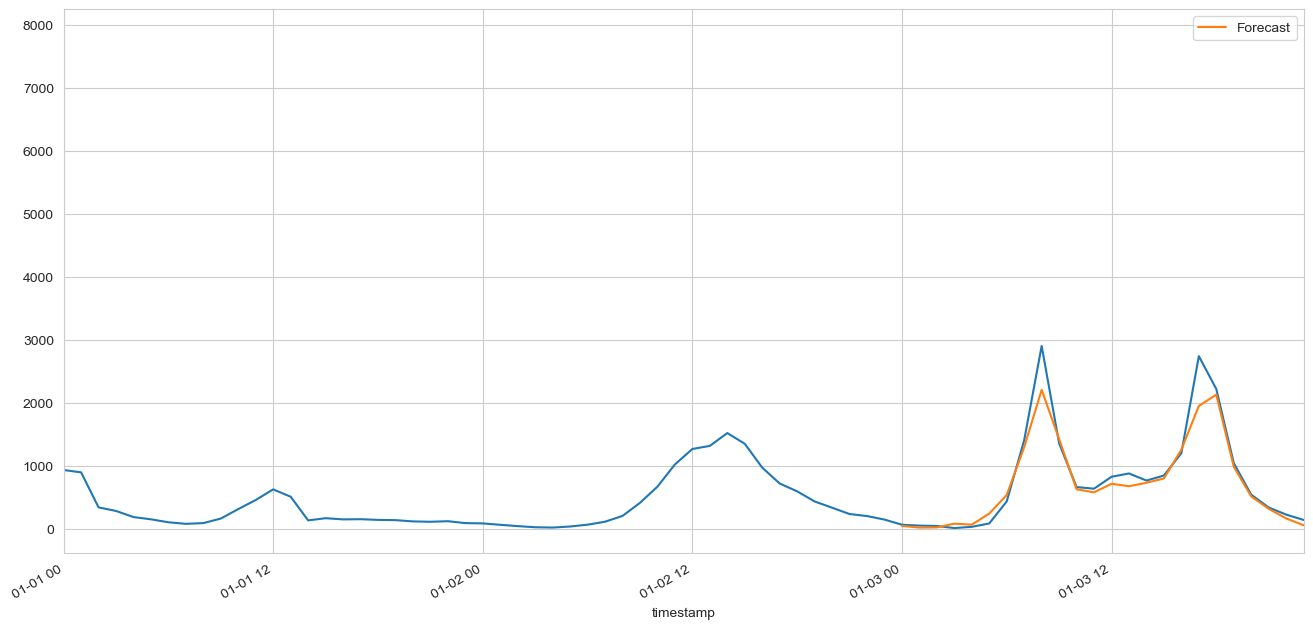

In [89]:
ax = df_raw["cnt"].plot()
forecast_df.plot(ax = ax, figsize = (16, 8))
plt.xlim('2017-01-01 00:00:00', '2017-01-03 23:00:00')

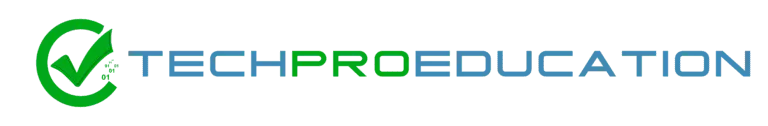